In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(parallel))
suppressMessages(library(ggrepel))
suppressMessages(library(circlize))

In [2]:
set.seed(42)
getwd()

addArchRThreads(threads = parallel::detectCores() - 2)
addArchRGenome("hg38")

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Cardiomyocyte/code"

Setting default number of Parallel threads to 126.

Setting default genome to Hg38.



In [3]:
## subset atac project
proj <- loadArchRProject("../data/snATAC_healthy_intermediate_damaged", showLogo = FALSE)

Successfully loaded ArchRProject!



Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-25347330b2f913-Date-2022-01-28_Time-09-23-50.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-28 09:23:50 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-28 09:23:50 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-25347330b2f913-Date-2022-01-28_Time-09-23-50.log



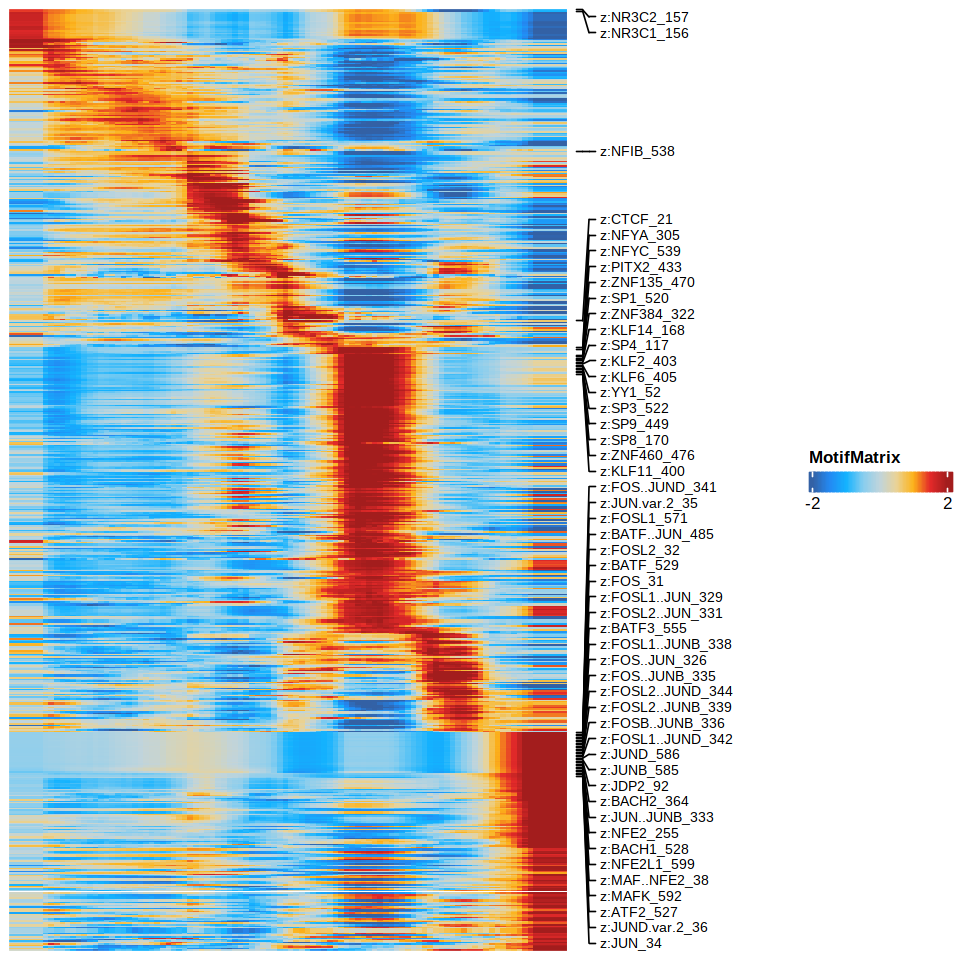

In [4]:
## we here assign a pseudo-time point label for each TF based on the its position in heatmap
trajMM  <- getTrajectory(ArchRProj = proj,
                         name = "healthy_intermediate_damaged",
                         useMatrix = "MotifMatrix",
                         log2Norm = FALSE,
                         scaleTo = NULL,
                        smoothWindow = 11)

trajMM <- trajMM[!grepl("deviations", rownames(trajMM)), ]

p1 <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2))

options(repr.plot.height = 8, repr.plot.width = 8)

p1

In [5]:
matMM <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2),
                              returnMatrix = TRUE)
nrow(matMM)

head(matMM)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-25347334288b00-Date-2022-01-28_Time-09-23-54.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-28 09:23:54 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-28 09:23:54 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-25347334288b00-Date-2022-01-28_Time-09-23-54.log



[1] 633

T.0_1    T.1_2    T.2_3    T.3_4    T.4_5    T.5_6    T.6_7   
z:NR3C2_157 1.456617 1.456617 1.456617 1.456617 1.456617 1.456617 1.320562
z:NR3C1_156 1.436415 1.436415 1.436415 1.436415 1.436415 1.436415 1.293528
z:FOXK2_574 1.730530 1.730530 1.730530 1.730530 1.730530 1.730530 1.400463
z:FOXI1_77  1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
z:FOXL1_78  1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
z:FOXO4_261 1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
            T.7_8    T.8_9    T.9_10   ⋯ T.90_91    T.91_92    T.92_93   
z:NR3C2_157 1.245552 1.229089 1.201918 ⋯ -0.5144636 -0.6031335 -0.7083256
z:NR3C1_156 1.223455 1.205079 1.180494 ⋯ -0.5197513 -0.6108760 -0.7159224
z:FOXK2_574 1.262478 1.225707 1.192475 ⋯ -1.0423590 -1.2135697 -1.4369552
z:FOXI1_77  1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
z:FOXL1_78  1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
z:FOXO4_261 1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
            T.93_94    T.94_95    T.95_96    T.96_97    T.97_98    T.98_99   
z:NR3C2_157 -0.8144477 -0.9652296 -0.9652296 -0.9652296 -0.9652296 -0.9652296
z:NR3C1_156 -0.8357267 -0.9913265 -0.9913265 -0.9913265 -0.9913265 -0.9913265
z:FOXK2_574 -1.6537288 -1.9354421 -1.9354421 -1.9354421 -1.9354421 -1.9354421
z:FOXI1_77  -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
z:FOXL1_78  -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
z:FOXO4_261 -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
            T.99_100  
z:NR3C2_157 -0.9652296
z:NR3C1_156 -0.9913265
z:FOXK2_574 -1.9354421
z:FOXI1_77  -1.8591259
z:FOXL1_78  -1.8591259
z:FOXO4_261 -1.8591259

In [6]:
df_tf_time_point <- data.frame(TF = rownames(matMM),
                              time_point = seq(1, 100, length.out = 633))

rownames(df_tf_time_point) <- rownames(matMM)
head(df_tf_time_point)

TF          time_point
z:NR3C2_157 z:NR3C2_157 1.000000  
z:NR3C1_156 z:NR3C1_156 1.156646  
z:FOXK2_574 z:FOXK2_574 1.313291  
z:FOXI1_77  z:FOXI1_77  1.469937  
z:FOXL1_78  z:FOXL1_78  1.626582  
z:FOXO4_261 z:FOXO4_261 1.783228

In [7]:
## load selected TFs by correlation analysis
df_tf <- read.csv("../data/snATAC_healthy_intermediate_damaged/sel_tf_by_expression.csv", 
                  row.names = 1)

head(df_tf)

idx1 idx2  matchname1 matchname2 name1       name2        Correlation
3   9    6062 RORA       RORA       z:RORA_9    chr15:RORA   0.3588709  
4  16   10193 REL        REL        z:REL_16    chr2:REL     0.1525305  
5  17    3251 RELA       RELA       z:RELA_17   chr11:RELA   0.1030552  
8  24   11533 NFATC2     NFATC2     z:NFATC2_24 chr20:NFATC2 0.1059962  
12 32   10042 FOSL2      FOSL2      z:FOSL2_32  chr2:FOSL2   0.3869445  
13 33   17643 FOXH1      FOXH1      z:FOXH1_33  chr8:FOXH1   0.2004729  
   VarAssay1   VarAssay2 TStat    Pval         FDR        
3  0.584518167 0.9259434 3.806181 2.458795e-04 0.005185823
4  0.426540284 0.6444339 1.527853 1.297703e-01 0.431544539
5  0.420221169 0.5125618 1.025655 3.075792e-01 0.659329184
8  0.731437599 0.7432461 1.055253 2.939041e-01 0.646310540
12 0.995260664 0.9255230 4.154151 6.982884e-05 0.002025036
13 0.007898894 0.9359298 2.025703 4.551371e-02 0.242739770

In [8]:
## here we plot the TFs sorted by the pseudo-time points as previously defined 
df_tf_time_point <- df_tf_time_point[df_tf$name1, ]
df_tf$time_point <- df_tf_time_point$time_point
df_tf <- df_tf[order(df_tf$time_point), ]

head(df_tf)

idx1 idx2  matchname1 matchname2 name1        name2       Correlation
43  157  14061 NR3C2      NR3C2      z:NR3C2_157  chr4:NR3C2  0.3878258  
42  156  14859 NR3C1      NR3C1      z:NR3C1_156  chr5:NR3C1  0.1458376  
89  480  18920 ZNF75D     ZNF75D     z:ZNF75D_480 chrX:ZNF75D 0.1935977  
35  106    709 NFIA       NFIA       z:NFIA_106   chr1:NFIA   0.6071054  
77  439   6035 RFX7       RFX7       z:RFX7_439   chr15:RFX7  0.4736850  
119 612  17673 RFX3       RFX3       z:RFX3_612   chr9:RFX3   0.3974752  
    VarAssay1 VarAssay2 TStat    Pval         FDR          time_point
43  0.9573460 0.9735099 4.165285 6.699715e-05 2.025036e-03  1.000000 
42  0.9557662 0.9041312 1.459321 1.476748e-01 4.614074e-01  1.156646 
89  0.1864139 0.7049301 1.953477 5.361457e-02 2.674964e-01  5.699367 
35  0.7282780 0.9399243 7.563397 2.140455e-11 2.482928e-09  8.205696 
77  0.4139021 0.9484390 5.324483 6.437030e-07 3.733477e-05  9.772152 
119 0.6429700 0.8272890 4.288087 4.225115e-05 1.508041e-03 10.555380

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


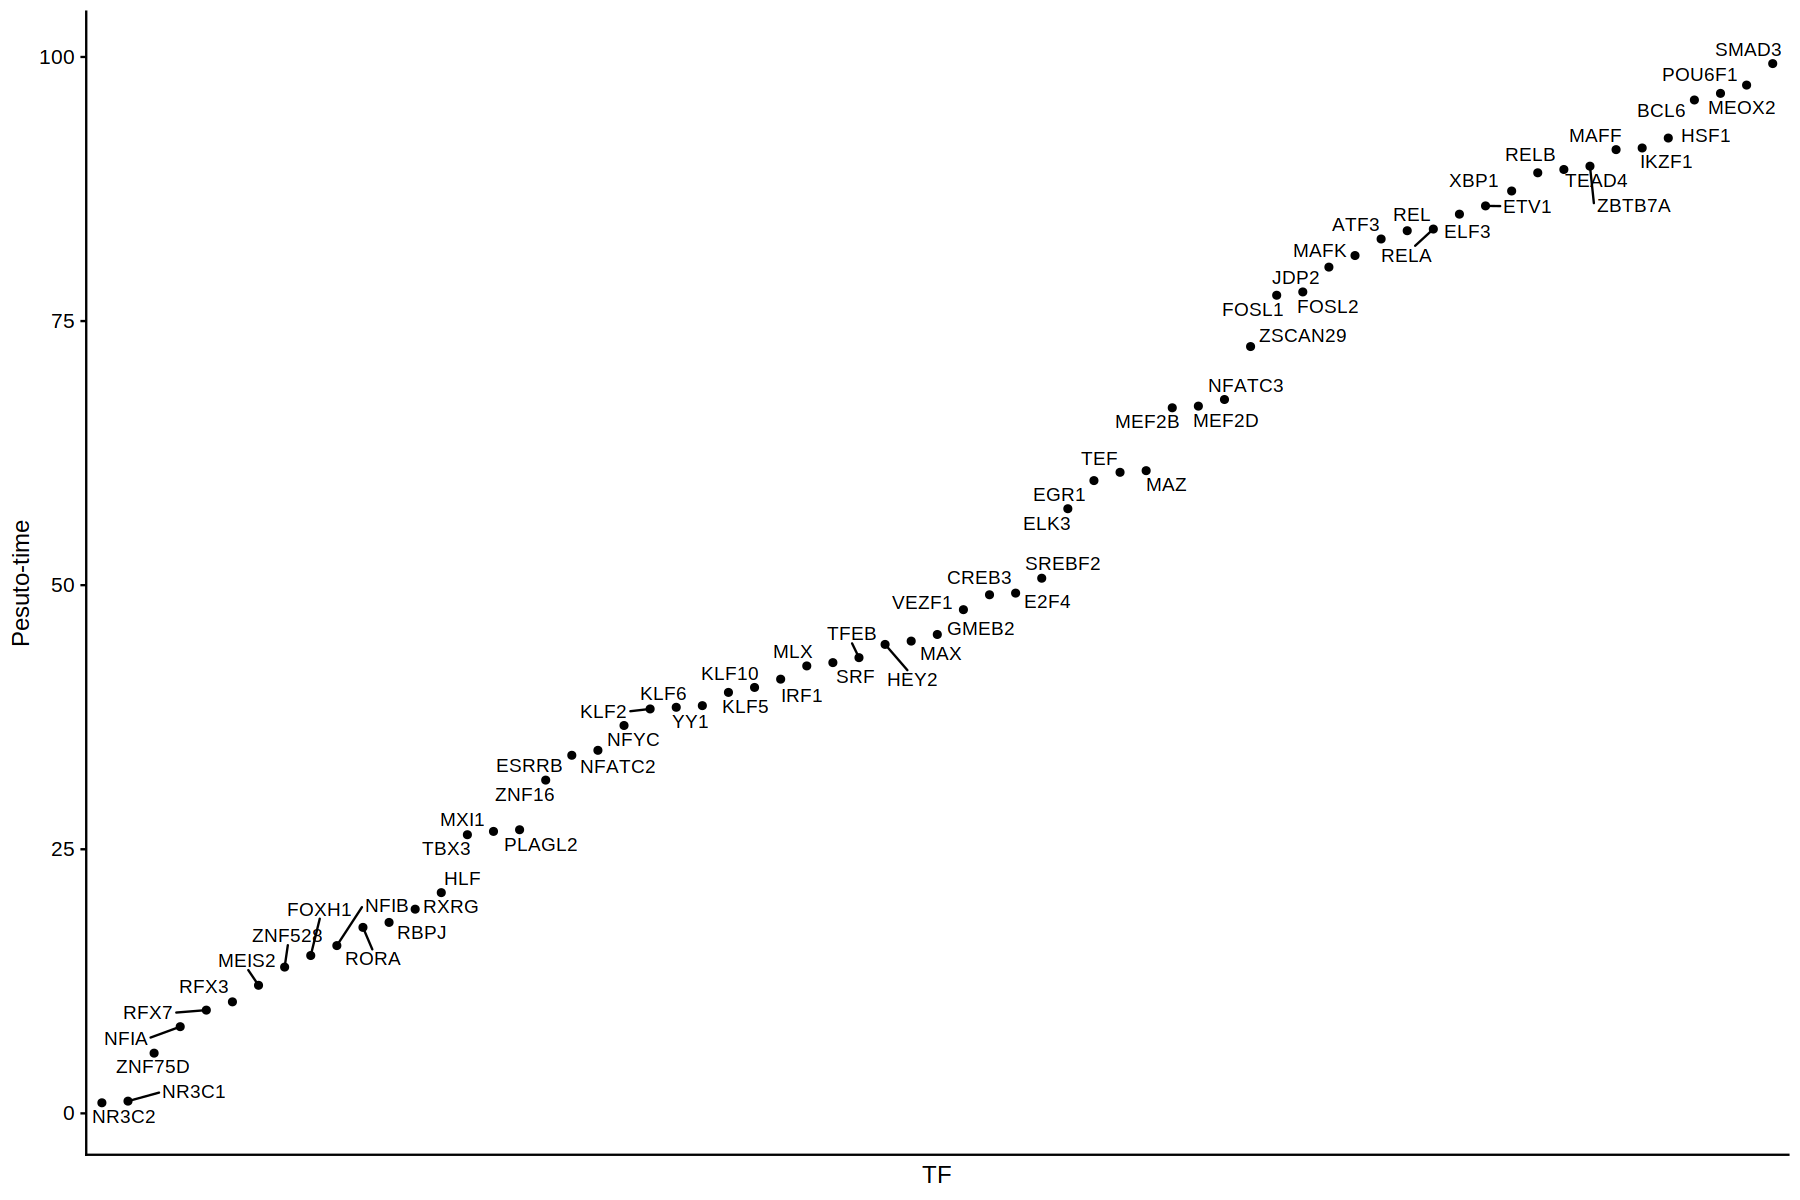

In [9]:
df_tf_sub <- df_tf[, c("matchname1", "time_point")]
colnames(df_tf_sub) <- c("tf", "time_point")

p <- ggplot(data = df_tf_sub, aes(x = reorder(tf, time_point), y = time_point, label = tf)) +
    geom_point() +
    geom_text_repel() +
    xlab("TF") + ylab("Pesuto-time") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())

options(repr.plot.height = 10, repr.plot.width = 15)

p

write.csv(df_tf_sub, "../data/snATAC_healthy_intermediate_damaged/time_point.csv")

In [10]:
## we next build TF-gene network based on the correlation of TF activity and gene expression

In [11]:
## first let's get tf activity and gene expression matrix along the trajectory
trajMM  <- getTrajectory(ArchRProj = proj,
                         name = "healthy_intermediate_damaged",
                         useMatrix = "MotifMatrix",
                         log2Norm = FALSE,
                         scaleTo = NULL,
                        smoothWindow = 11)

trajMM <- trajMM[!grepl("deviations", rownames(trajMM)), ]

trajGEX <- getTrajectory(ArchRProj = proj,
                         name = "healthy_intermediate_damaged",
                         useMatrix = "GeneExpressionMatrix",
                         log2Norm = TRUE,
                        smoothWindow = 11)

tf_activity <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2),
                           returnMatrix = TRUE)

gene_expression <- plotTrajectoryHeatmap(trajGEX,
                        varCutOff = 0.9,
                        pal = paletteContinuous(set = "horizonExtra"),
                        limits = c(-2, 2),
                                         returnMatrix = TRUE)

Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2534731682b770-Date-2022-01-28_Time-09-24-13.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-28 09:24:13 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-28 09:24:13 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2534731682b770-Date-2022-01-28_Time-09-24-13.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-253473980fca5-Date-2022-01-28_Time-09-24-13.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set

In [12]:
head(tf_activity)
head(gene_expression)

T.0_1    T.1_2    T.2_3    T.3_4    T.4_5    T.5_6    T.6_7   
z:NR3C2_157 1.456617 1.456617 1.456617 1.456617 1.456617 1.456617 1.320562
z:NR3C1_156 1.436415 1.436415 1.436415 1.436415 1.436415 1.436415 1.293528
z:FOXK2_574 1.730530 1.730530 1.730530 1.730530 1.730530 1.730530 1.400463
z:FOXI1_77  1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
z:FOXL1_78  1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
z:FOXO4_261 1.700140 1.700140 1.700140 1.700140 1.700140 1.700140 1.326385
            T.7_8    T.8_9    T.9_10   ⋯ T.90_91    T.91_92    T.92_93   
z:NR3C2_157 1.245552 1.229089 1.201918 ⋯ -0.5144636 -0.6031335 -0.7083256
z:NR3C1_156 1.223455 1.205079 1.180494 ⋯ -0.5197513 -0.6108760 -0.7159224
z:FOXK2_574 1.262478 1.225707 1.192475 ⋯ -1.0423590 -1.2135697 -1.4369552
z:FOXI1_77  1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
z:FOXL1_78  1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
z:FOXO4_261 1.165520 1.125058 1.071934 ⋯ -1.0001035 -1.1603463 -1.3823222
            T.93_94    T.94_95    T.95_96    T.96_97    T.97_98    T.98_99   
z:NR3C2_157 -0.8144477 -0.9652296 -0.9652296 -0.9652296 -0.9652296 -0.9652296
z:NR3C1_156 -0.8357267 -0.9913265 -0.9913265 -0.9913265 -0.9913265 -0.9913265
z:FOXK2_574 -1.6537288 -1.9354421 -1.9354421 -1.9354421 -1.9354421 -1.9354421
z:FOXI1_77  -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
z:FOXL1_78  -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
z:FOXO4_261 -1.5938758 -1.8591259 -1.8591259 -1.8591259 -1.8591259 -1.8591259
            T.99_100  
z:NR3C2_157 -0.9652296
z:NR3C1_156 -0.9913265
z:FOXK2_574 -1.9354421
z:FOXI1_77  -1.8591259
z:FOXL1_78  -1.8591259
z:FOXO4_261 -1.8591259

T.0_1    T.1_2    T.2_3    T.3_4    T.4_5    T.5_6    T.6_7    
chr3:FGF12-AS1  1.102714 1.102714 1.102714 1.102714 1.102714 1.102714 1.0755761
chr6:TRDN       1.008496 1.008496 1.008496 1.008496 1.008496 1.008496 0.9887395
chr3:KCNMB2     1.055672 1.055672 1.055672 1.055672 1.055672 1.055672 1.0534571
chr2:SPHKAP     1.253434 1.253434 1.253434 1.253434 1.253434 1.253434 1.2443691
chr3:KCNMB2-AS1 1.560240 1.560240 1.560240 1.560240 1.560240 1.560240 1.4960507
chr2:SLC8A1-AS1 1.953424 1.953424 1.953424 1.953424 1.953424 1.953424 1.8125912
                T.7_8    T.8_9     T.9_10    ⋯ T.90_91   T.91_92   T.92_93  
chr3:FGF12-AS1  1.079774 1.0734482 1.0390322 ⋯ -1.794514 -1.851446 -1.885445
chr6:TRDN       1.004000 0.9751909 0.9538634 ⋯ -2.000000 -2.000000 -2.000000
chr3:KCNMB2     1.031157 1.0397114 0.9937848 ⋯ -2.000000 -2.000000 -2.000000
chr2:SPHKAP     1.245325 1.2127420 1.1677723 ⋯ -1.928237 -1.911544 -1.974615
chr3:KCNMB2-AS1 1.335663 1.1776613 1.0914005 ⋯ -1.961298 -1.932184 -1.951784
chr2:SLC8A1-AS1 1.635967 1.4608148 1.3088614 ⋯ -1.729657 -1.679926 -1.732813
                T.93_94   T.94_95   T.95_96   T.96_97   T.97_98   T.98_99  
chr3:FGF12-AS1  -1.946493 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000
chr6:TRDN       -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000
chr3:KCNMB2     -2.000000 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000
chr2:SPHKAP     -1.974068 -1.911232 -1.911232 -1.911232 -1.911232 -1.911232
chr3:KCNMB2-AS1 -1.907314 -2.000000 -2.000000 -2.000000 -2.000000 -2.000000
chr2:SLC8A1-AS1 -1.671962 -1.694868 -1.694868 -1.694868 -1.694868 -1.694868
                T.99_100 
chr3:FGF12-AS1  -2.000000
chr6:TRDN       -2.000000
chr3:KCNMB2     -2.000000
chr2:SPHKAP     -1.911232
chr3:KCNMB2-AS1 -2.000000
chr2:SLC8A1-AS1 -1.694868

In [13]:
dim(tf_activity)
dim(gene_expression)

[1] 633 100

[1] 1902  100

In [14]:
## here we filter the TFs according to our correlation analysis
tf_activity <- tf_activity[df_tf$name1, ]

In [15]:
## here we further filter the genes by only consider genes that are linked to peaks
df_p2g <- read.csv("../data/snATAC_healthy_intermediate_damaged/p2g.csv", row.name = 1)
head(df_p2g)

## check how many genes have associated peaks
sel_genes <- intersect(rownames(gene_expression), unique(df_p2g$gene_name))
length(sel_genes)

## subset the gene expression matrix
gene_expression <- gene_expression[sel_genes, ]

idxATAC idxRNA Correlation FDR          VarQATAC  VarQRNA   Distance
1   7963   1      0.6533091   1.129005e-12 0.8682495 0.6493165   9173  
7  22801   1      0.4280020   2.138076e-05 0.4408613 0.6493165  29949  
9  45359   1      0.5528661   9.375059e-09 0.9218023 0.6493165 115679  
10 66048   1      0.5318030   4.336000e-08 0.4062662 0.6493165  12940  
32   847   2      0.4519074   6.120493e-06 0.8739520 0.3002103 195306  
36  2028   2      0.5527832   9.433825e-09 0.6125039 0.3002103 170851  
   gene      peak                     peak_name                gene_name     
1  FGF12-AS1 chr3_192247211_192247711 chr3:192247211_192247711 chr3:FGF12-AS1
7  FGF12-AS1 chr3_192207587_192208087 chr3:192207587_192208087 chr3:FGF12-AS1
9  FGF12-AS1 chr3_192121857_192122357 chr3:192121857_192122357 chr3:FGF12-AS1
10 FGF12-AS1 chr3_192224596_192225096 chr3:192224596_192225096 chr3:FGF12-AS1
32 TRDN      chr6_123441286_123441786 chr6:123441286_123441786 chr6:TRDN     
36 TRDN      chr6_123465741_123466241 chr6:123465741_123466241 chr6:TRDN

[1] 1827

In [16]:
## compute the correlation of TF activity and gene expression along the trajectory
df_cor <- t(cor(t(tf_activity), t(gene_expression)))
df_cor <- df_cor[, df_tf$name1]

In [17]:
head(df_cor)

write.csv(df_cor, "../data/snATAC_healthy_intermediate_damaged/tf_gene_correlation.csv")

z:NR3C2_157 z:NR3C1_156 z:ZNF75D_480 z:NFIA_106 z:RFX7_439
chr3:FGF12-AS1  0.7365434   0.7386288   0.5007122    0.5549883  0.7783018 
chr6:TRDN       0.6660046   0.6687593   0.4950025    0.5352448  0.7981106 
chr3:KCNMB2     0.7398526   0.7424441   0.4825137    0.4584859  0.7473307 
chr2:SPHKAP     0.6645800   0.6644963   0.5497221    0.5991887  0.8116371 
chr3:KCNMB2-AS1 0.6921412   0.6939508   0.4669396    0.2202549  0.5781956 
chr2:SLC8A1-AS1 0.7324789   0.7335917   0.4830335    0.1230302  0.4394088 
                z:RFX3_612 z:MEIS2_194  z:ZNF528_477 z:FOXH1_33 z:NFIB_538  ⋯
chr3:FGF12-AS1  0.8755124   0.456019518  0.06151456  0.6760498   0.32221599 ⋯
chr6:TRDN       0.8768577   0.407933680  0.04123713  0.7274919   0.30669742 ⋯
chr3:KCNMB2     0.8387288   0.351912510 -0.04075809  0.7301438   0.20742343 ⋯
chr2:SPHKAP     0.8777601   0.500722344  0.14594302  0.7039130   0.38191948 ⋯
chr3:KCNMB2-AS1 0.6302010   0.093399243 -0.23513433  0.7348253  -0.05253383 ⋯
chr2:SLC8A1-AS1 0.4894729  -0.006288796 -0.32472272  0.6194521  -0.15346486 ⋯
                z:RELB_312 z:TEAD4_625 z:ZBTB7A_319 z:MAFF_590 z:IKZF1_397
chr3:FGF12-AS1  -0.4566895 -0.03187575 -0.4902979   -0.3730547 -0.2436141 
chr6:TRDN       -0.5454452 -0.09226494 -0.5118394   -0.4048833 -0.2958496 
chr3:KCNMB2     -0.5341883 -0.15272647 -0.4350573   -0.4675371 -0.3278687 
chr2:SPHKAP     -0.4537911  0.03183889 -0.5628913   -0.2814445 -0.1610914 
chr3:KCNMB2-AS1 -0.5231511 -0.37350092 -0.2683432   -0.5957130 -0.3794078 
chr2:SLC8A1-AS1 -0.3883563 -0.41342483 -0.1617450   -0.6369100 -0.3664750 
                z:HSF1_88  z:BCL6_486 z:MEOX2_134 z:POU6F1_62 z:SMAD3_216
chr3:FGF12-AS1  -0.5357956 -0.2996307 -0.6502254  -0.6430772  -0.2446265 
chr6:TRDN       -0.5619890 -0.3384163 -0.6400678  -0.6673705  -0.3325390 
chr3:KCNMB2     -0.4953098 -0.3988921 -0.7064703  -0.6888417  -0.3431066 
chr2:SPHKAP     -0.6189066 -0.2644749 -0.5928060  -0.6310157  -0.2453075 
chr3:KCNMB2-AS1 -0.2996219 -0.4651697 -0.6465819  -0.5995747  -0.4510676 
chr2:SLC8A1-AS1 -0.1191030 -0.4176766 -0.5831431  -0.4638173  -0.3897000

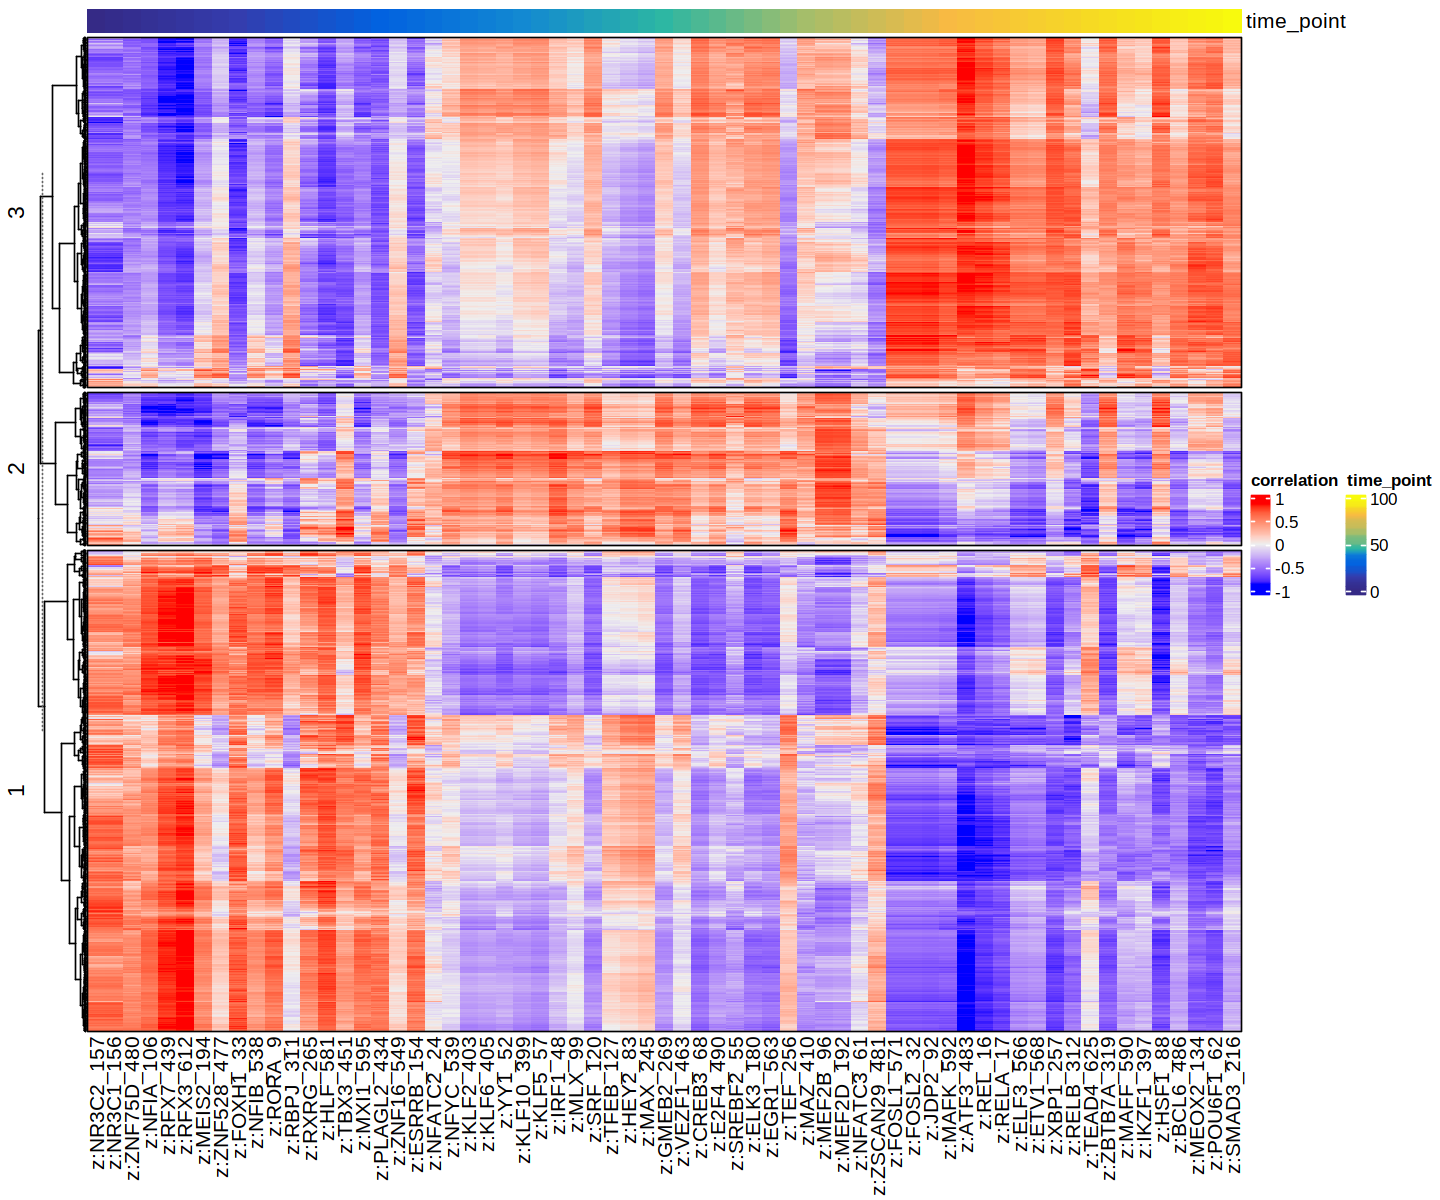

In [18]:
col_fun = colorRamp2(df_tf$time_point, 
                     ArchR::paletteContinuous(set = "blueYellow", n = length(df_tf$time_point)))

column_ha <- HeatmapAnnotation(time_point = df_tf$time_point,
                              col = list(time_point = col_fun))

ht1 <- Heatmap(as.matrix(df_cor),
               name = "correlation",
               cluster_columns = FALSE,
             clustering_method_rows = "ward.D2",
               top_annotation = column_ha,
              show_row_names = FALSE,
              row_km = 3,
              border = TRUE)

options(repr.plot.width = 12, repr.plot.height = 10)

draw(ht1)

In [19]:
gene_cluster <- row_order(ht1)

gene_c1 <- rownames(df_cor[gene_cluster[[1]], ])
gene_c2 <- rownames(df_cor[gene_cluster[[2]], ])
gene_c3 <- rownames(df_cor[gene_cluster[[3]], ])

length(gene_c1)
length(gene_c2)
length(gene_c3)

Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`.”


[1] 650

[1] 284

[1] 893

In [20]:
df_gene <- lapply(1:length(gene_cluster), function(i){
    df <- rownames(df_cor[gene_cluster[[i]], ]) %>%
        as.data.frame()

    colnames(df) <- "gene"
    df$cluster <- i
    
    return(df)

}) %>% Reduce(rbind, .)

df_gene$cluster <- stringr::str_replace_all(df_gene$cluster, c("1" = "damaged_CM",
                                                              "2" = "intermediate_CM",
                                                              "3" = "healthy_CM"))

In [21]:
df_gene$gene <- stringr::str_split_fixed(df_gene$gene, ":", 2)[, 2]
write.csv(df_gene, "../data/snATAC_healthy_intermediate_damaged/gene_cluster.csv")

head(df_gene)

gene      cluster   
1 LINC00486 damaged_CM
2 LARGE1    damaged_CM
3 PPP1R42   damaged_CM
4 TNRC18    damaged_CM
5 GYS1      damaged_CM
6 CHST3     damaged_CM

In [22]:
df_gene[df_gene$gene == "NPPB", ]

gene cluster   
51 NPPB damaged_CM

In [23]:
## we next use peak-to-gene links to predicte the target genes for each TF
mat_p2g <- df_p2g %>%
    select(c(peak_name, gene_name, Correlation)) %>%
    tidyr::pivot_wider(names_from = peak_name, values_from = Correlation) %>%
    textshape::column_to_rownames("gene_name")

mat_p2g[is.na(mat_p2g)] <- 0
mat_p2g[mat_p2g>0] <- 1

head(mat_p2g)

chr3:192247211_192247711 chr3:192207587_192208087
chr3:FGF12-AS1  1                        1                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr3:192121857_192122357 chr3:192224596_192225096
chr3:FGF12-AS1  1                        1                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr6:123441286_123441786 chr6:123465741_123466241
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       1                        1                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr6:123508260_123508760 chr6:123522996_123523496
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       1                        1                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr6:123484737_123485237 chr6:123454427_123454927 ⋯
chr3:FGF12-AS1  0                        0                        ⋯
chr6:TRDN       1                        1                        ⋯
chr3:KCNMB2     0                        0                        ⋯
chr2:SPHKAP     0                        0                        ⋯
chr3:KCNMB2-AS1 0                        0                        ⋯
chr2:SLC8A1-AS1 0                        0                        ⋯
                chr3:125001695_125002195 chr3:125087694_125088194
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr1:151070243_151070743 chr1:151069314_151069814
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr1:151238300_151238800 chr1:151060045_151060545
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0                       
chr3:KCNMB2-AS1 0                        0                       
chr2:SLC8A1-AS1 0                        0                       
                chr1:150977235_150977735 chr1:151005947_151006447
chr3:FGF12-AS1  0                        0                       
chr6:TRDN       0                        0                       
chr3:KCNMB2     0                        0                       
chr2:SPHKAP     0                        0

In [24]:
dim(mat_p2g)

[1]  1827 30053

In [25]:
## read motif matching results
motif_matching <- readRDS("../data/snATAC_healthy_intermediate_damaged/Annotations/Motif-Matches-In-Peaks.rds")

rowRanges <- rowRanges(motif_matching)

chr <- seqnames(rowRanges)
ranges <- as.data.frame(ranges(rowRanges))

matches <- as.matrix(assays(motif_matching)$matches)
colnames(matches) <- paste0("z:", colnames(matches))
rownames(matches) <- paste0(chr, ":", ranges$start, "_", ranges$end)

## only consider the selected TFs and gene-associated peaks
matches <- matches[colnames(mat_p2g), 
                   colnames(df_cor)]

head(matches)

z:NR3C2_157 z:NR3C1_156 z:ZNF75D_480 z:NFIA_106
chr3:192247211_192247711 FALSE       FALSE       FALSE        FALSE     
chr3:192207587_192208087 FALSE       FALSE       FALSE        FALSE     
chr3:192121857_192122357 FALSE       FALSE       FALSE        FALSE     
chr3:192224596_192225096 FALSE       FALSE       FALSE        FALSE     
chr6:123441286_123441786 FALSE       FALSE       FALSE        FALSE     
chr6:123465741_123466241 FALSE       FALSE       FALSE        FALSE     
                         z:RFX7_439 z:RFX3_612 z:MEIS2_194 z:ZNF528_477
chr3:192247211_192247711 FALSE      FALSE      FALSE       FALSE       
chr3:192207587_192208087 FALSE      FALSE      FALSE       FALSE       
chr3:192121857_192122357 FALSE      FALSE      FALSE       FALSE       
chr3:192224596_192225096 FALSE      FALSE      FALSE       FALSE       
chr6:123441286_123441786 FALSE      FALSE      FALSE       FALSE       
chr6:123465741_123466241 FALSE      FALSE      FALSE       FALSE       
                         z:FOXH1_33 z:NFIB_538 ⋯ z:RELB_312 z:TEAD4_625
chr3:192247211_192247711  TRUE      FALSE      ⋯ FALSE       TRUE      
chr3:192207587_192208087 FALSE       TRUE      ⋯  TRUE      FALSE      
chr3:192121857_192122357 FALSE      FALSE      ⋯ FALSE      FALSE      
chr3:192224596_192225096 FALSE       TRUE      ⋯ FALSE      FALSE      
chr6:123441286_123441786  TRUE      FALSE      ⋯ FALSE      FALSE      
chr6:123465741_123466241 FALSE      FALSE      ⋯ FALSE      FALSE      
                         z:ZBTB7A_319 z:MAFF_590 z:IKZF1_397 z:HSF1_88
chr3:192247211_192247711 FALSE         TRUE      FALSE       FALSE    
chr3:192207587_192208087  TRUE        FALSE      FALSE       FALSE    
chr3:192121857_192122357 FALSE        FALSE      FALSE       FALSE    
chr3:192224596_192225096 FALSE        FALSE      FALSE       FALSE    
chr6:123441286_123441786 FALSE        FALSE       TRUE       FALSE    
chr6:123465741_123466241 FALSE        FALSE       TRUE       FALSE    
                         z:BCL6_486 z:MEOX2_134 z:POU6F1_62 z:SMAD3_216
chr3:192247211_192247711 FALSE      FALSE       FALSE       FALSE      
chr3:192207587_192208087 FALSE       TRUE       FALSE       FALSE      
chr3:192121857_192122357 FALSE      FALSE       FALSE       FALSE      
chr3:192224596_192225096 FALSE      FALSE       FALSE       FALSE      
chr6:123441286_123441786  TRUE       TRUE       FALSE       FALSE      
chr6:123465741_123466241 FALSE       TRUE       FALSE        TRUE

In [26]:
dim(matches)

[1] 30053    65

In [27]:
## multiply gene by peak and peak by tf matrix to obtain gene by tf matrix
gene_tf <- as.matrix(mat_p2g) %*% as.matrix(matches)
head(gene_tf)

z:NR3C2_157 z:NR3C1_156 z:ZNF75D_480 z:NFIA_106 z:RFX7_439
chr3:FGF12-AS1  0           0           0            0          0         
chr6:TRDN       0           0           1            1          0         
chr3:KCNMB2     0           0           0            0          0         
chr2:SPHKAP     1           1           2            0          1         
chr3:KCNMB2-AS1 1           1           0            0          0         
chr2:SLC8A1-AS1 0           0           2            0          0         
                z:RFX3_612 z:MEIS2_194 z:ZNF528_477 z:FOXH1_33 z:NFIB_538 ⋯
chr3:FGF12-AS1  0          0           0            1          2          ⋯
chr6:TRDN       0          2           0            3          1          ⋯
chr3:KCNMB2     1          0           0            0          0          ⋯
chr2:SPHKAP     2          0           1            0          0          ⋯
chr3:KCNMB2-AS1 0          0           0            0          0          ⋯
chr2:SLC8A1-AS1 0          0           1            0          1          ⋯
                z:RELB_312 z:TEAD4_625 z:ZBTB7A_319 z:MAFF_590 z:IKZF1_397
chr3:FGF12-AS1  1          1           1            1          0          
chr6:TRDN       1          3           0            4          4          
chr3:KCNMB2     1          0           0            2          0          
chr2:SPHKAP     1          0           1            0          2          
chr3:KCNMB2-AS1 0          0           0            1          1          
chr2:SLC8A1-AS1 0          1           0            0          0          
                z:HSF1_88 z:BCL6_486 z:MEOX2_134 z:POU6F1_62 z:SMAD3_216
chr3:FGF12-AS1  0         0          1           0           0          
chr6:TRDN       2         2          2           0           1          
chr3:KCNMB2     0         0          0           0           0          
chr2:SPHKAP     0         0          0           0           0          
chr3:KCNMB2-AS1 0         0          0           0           0          
chr2:SLC8A1-AS1 0         1          1           0           0

In [28]:
## we binarize this matrix to indicate if a gene is regulated by a TF through a peak
gene_tf[gene_tf>0] <- 1

In [29]:
## here we multiply correlation matrix and regulation matrix
df_cor <- df_cor * gene_tf
head(df_cor)

z:NR3C2_157 z:NR3C1_156 z:ZNF75D_480 z:NFIA_106 z:RFX7_439
chr3:FGF12-AS1  0.0000000   0.0000000   0.0000000    0.0000000  0.0000000 
chr6:TRDN       0.0000000   0.0000000   0.4950025    0.5352448  0.0000000 
chr3:KCNMB2     0.0000000   0.0000000   0.0000000    0.0000000  0.0000000 
chr2:SPHKAP     0.6645800   0.6644963   0.5497221    0.0000000  0.8116371 
chr3:KCNMB2-AS1 0.6921412   0.6939508   0.0000000    0.0000000  0.0000000 
chr2:SLC8A1-AS1 0.0000000   0.0000000   0.4830335    0.0000000  0.0000000 
                z:RFX3_612 z:MEIS2_194 z:ZNF528_477 z:FOXH1_33 z:NFIB_538 ⋯
chr3:FGF12-AS1  0.0000000  0.0000000    0.0000000   0.6760498   0.3222160 ⋯
chr6:TRDN       0.0000000  0.4079337    0.0000000   0.7274919   0.3066974 ⋯
chr3:KCNMB2     0.8387288  0.0000000    0.0000000   0.0000000   0.0000000 ⋯
chr2:SPHKAP     0.8777601  0.0000000    0.1459430   0.0000000   0.0000000 ⋯
chr3:KCNMB2-AS1 0.0000000  0.0000000    0.0000000   0.0000000   0.0000000 ⋯
chr2:SLC8A1-AS1 0.0000000  0.0000000   -0.3247227   0.0000000  -0.1534649 ⋯
                z:RELB_312 z:TEAD4_625 z:ZBTB7A_319 z:MAFF_590 z:IKZF1_397
chr3:FGF12-AS1  -0.4566895 -0.03187575 -0.4902979   -0.3730547  0.0000000 
chr6:TRDN       -0.5454452 -0.09226494  0.0000000   -0.4048833 -0.2958496 
chr3:KCNMB2     -0.5341883  0.00000000  0.0000000   -0.4675371  0.0000000 
chr2:SPHKAP     -0.4537911  0.00000000 -0.5628913    0.0000000 -0.1610914 
chr3:KCNMB2-AS1  0.0000000  0.00000000  0.0000000   -0.5957130 -0.3794078 
chr2:SLC8A1-AS1  0.0000000 -0.41342483  0.0000000    0.0000000  0.0000000 
                z:HSF1_88 z:BCL6_486 z:MEOX2_134 z:POU6F1_62 z:SMAD3_216
chr3:FGF12-AS1   0.000000  0.0000000 -0.6502254  0            0.000000  
chr6:TRDN       -0.561989 -0.3384163 -0.6400678  0           -0.332539  
chr3:KCNMB2      0.000000  0.0000000  0.0000000  0            0.000000  
chr2:SPHKAP      0.000000  0.0000000  0.0000000  0            0.000000  
chr3:KCNMB2-AS1  0.000000  0.0000000  0.0000000  0            0.000000  
chr2:SLC8A1-AS1  0.000000 -0.4176766 -0.5831431  0            0.000000

In [30]:
suppressMessages(library(igraph))

In [31]:
df_cor <- as.data.frame(df_cor)

In [32]:
df_cor$gene <- rownames(df_cor)
head(df_cor)

z:NR3C2_157 z:NR3C1_156 z:ZNF75D_480 z:NFIA_106 z:RFX7_439
chr3:FGF12-AS1  0.0000000   0.0000000   0.0000000    0.0000000  0.0000000 
chr6:TRDN       0.0000000   0.0000000   0.4950025    0.5352448  0.0000000 
chr3:KCNMB2     0.0000000   0.0000000   0.0000000    0.0000000  0.0000000 
chr2:SPHKAP     0.6645800   0.6644963   0.5497221    0.0000000  0.8116371 
chr3:KCNMB2-AS1 0.6921412   0.6939508   0.0000000    0.0000000  0.0000000 
chr2:SLC8A1-AS1 0.0000000   0.0000000   0.4830335    0.0000000  0.0000000 
                z:RFX3_612 z:MEIS2_194 z:ZNF528_477 z:FOXH1_33 z:NFIB_538 ⋯
chr3:FGF12-AS1  0.0000000  0.0000000    0.0000000   0.6760498   0.3222160 ⋯
chr6:TRDN       0.0000000  0.4079337    0.0000000   0.7274919   0.3066974 ⋯
chr3:KCNMB2     0.8387288  0.0000000    0.0000000   0.0000000   0.0000000 ⋯
chr2:SPHKAP     0.8777601  0.0000000    0.1459430   0.0000000   0.0000000 ⋯
chr3:KCNMB2-AS1 0.0000000  0.0000000    0.0000000   0.0000000   0.0000000 ⋯
chr2:SLC8A1-AS1 0.0000000  0.0000000   -0.3247227   0.0000000  -0.1534649 ⋯
                z:TEAD4_625 z:ZBTB7A_319 z:MAFF_590 z:IKZF1_397 z:HSF1_88
chr3:FGF12-AS1  -0.03187575 -0.4902979   -0.3730547  0.0000000   0.000000
chr6:TRDN       -0.09226494  0.0000000   -0.4048833 -0.2958496  -0.561989
chr3:KCNMB2      0.00000000  0.0000000   -0.4675371  0.0000000   0.000000
chr2:SPHKAP      0.00000000 -0.5628913    0.0000000 -0.1610914   0.000000
chr3:KCNMB2-AS1  0.00000000  0.0000000   -0.5957130 -0.3794078   0.000000
chr2:SLC8A1-AS1 -0.41342483  0.0000000    0.0000000  0.0000000   0.000000
                z:BCL6_486 z:MEOX2_134 z:POU6F1_62 z:SMAD3_216 gene           
chr3:FGF12-AS1   0.0000000 -0.6502254  0            0.000000   chr3:FGF12-AS1 
chr6:TRDN       -0.3384163 -0.6400678  0           -0.332539   chr6:TRDN      
chr3:KCNMB2      0.0000000  0.0000000  0            0.000000   chr3:KCNMB2    
chr2:SPHKAP      0.0000000  0.0000000  0            0.000000   chr2:SPHKAP    
chr3:KCNMB2-AS1  0.0000000  0.0000000  0            0.000000   chr3:KCNMB2-AS1
chr2:SLC8A1-AS1 -0.4176766 -0.5831431  0            0.000000   chr2:SLC8A1-AS1

In [33]:
df_cor_2 <- df_cor %>%
    tidyr::pivot_longer(!gene, names_to = "tf", values_to = "correlation") %>%
    subset(correlation > 0.5) %>%
    select(c(tf, gene, correlation))

# ## we further remove genes with -AS1
df_cor_2 <- df_cor_2[!grepl("-AS", df_cor_2$gene), ]

## update tf and gene name
df_cor_2$tf <- stringr::str_split_fixed(df_cor_2$tf, ":", 2)[, 2]
df_cor_2$tf <- stringr::str_split_fixed(df_cor_2$tf, "_", 2)[, 1]
df_cor_2$gene <- stringr::str_split_fixed(df_cor_2$gene, ":", 2)[, 2]

head(df_cor_2)
nrow(df_cor_2)

write.csv(df_cor_2, "../data/snATAC_healthy_intermediate_damaged/gene_regulatory_network.csv", 
          row.names = FALSE)

tf    gene   correlation
1 NFIA  TRDN   0.5352448  
2 FOXH1 TRDN   0.7274919  
3 HLF   TRDN   0.7511693  
4 ESRRB TRDN   0.5484806  
5 RFX3  KCNMB2 0.8387288  
6 NR3C2 SPHKAP 0.6645800

[1] 12009

In [34]:
g <- graph_from_data_frame(df_cor_2, directed=FALSE)

tf_colors <- ArchR::paletteContinuous(set = "blueYellow", n = 65)
names(tf_colors) <- df_tf$name1

gene_colors <- rep("white", length(unique(df_cor_2$gene)))
names(gene_colors) <- unique(df_cor_2$gene)

vertex.color <- c(tf_colors, gene_colors)


tf_colors <- ArchR::paletteContinuous(set = "blueYellow", n = 65)
names(tf_colors) <- df_tf$name1

gene_colors <- rep("black", length(unique(df_cor_2$gene)))
names(gene_colors) <- unique(df_cor_2$gene)

vertex.frame.color <- c(tf_colors, gene_colors)

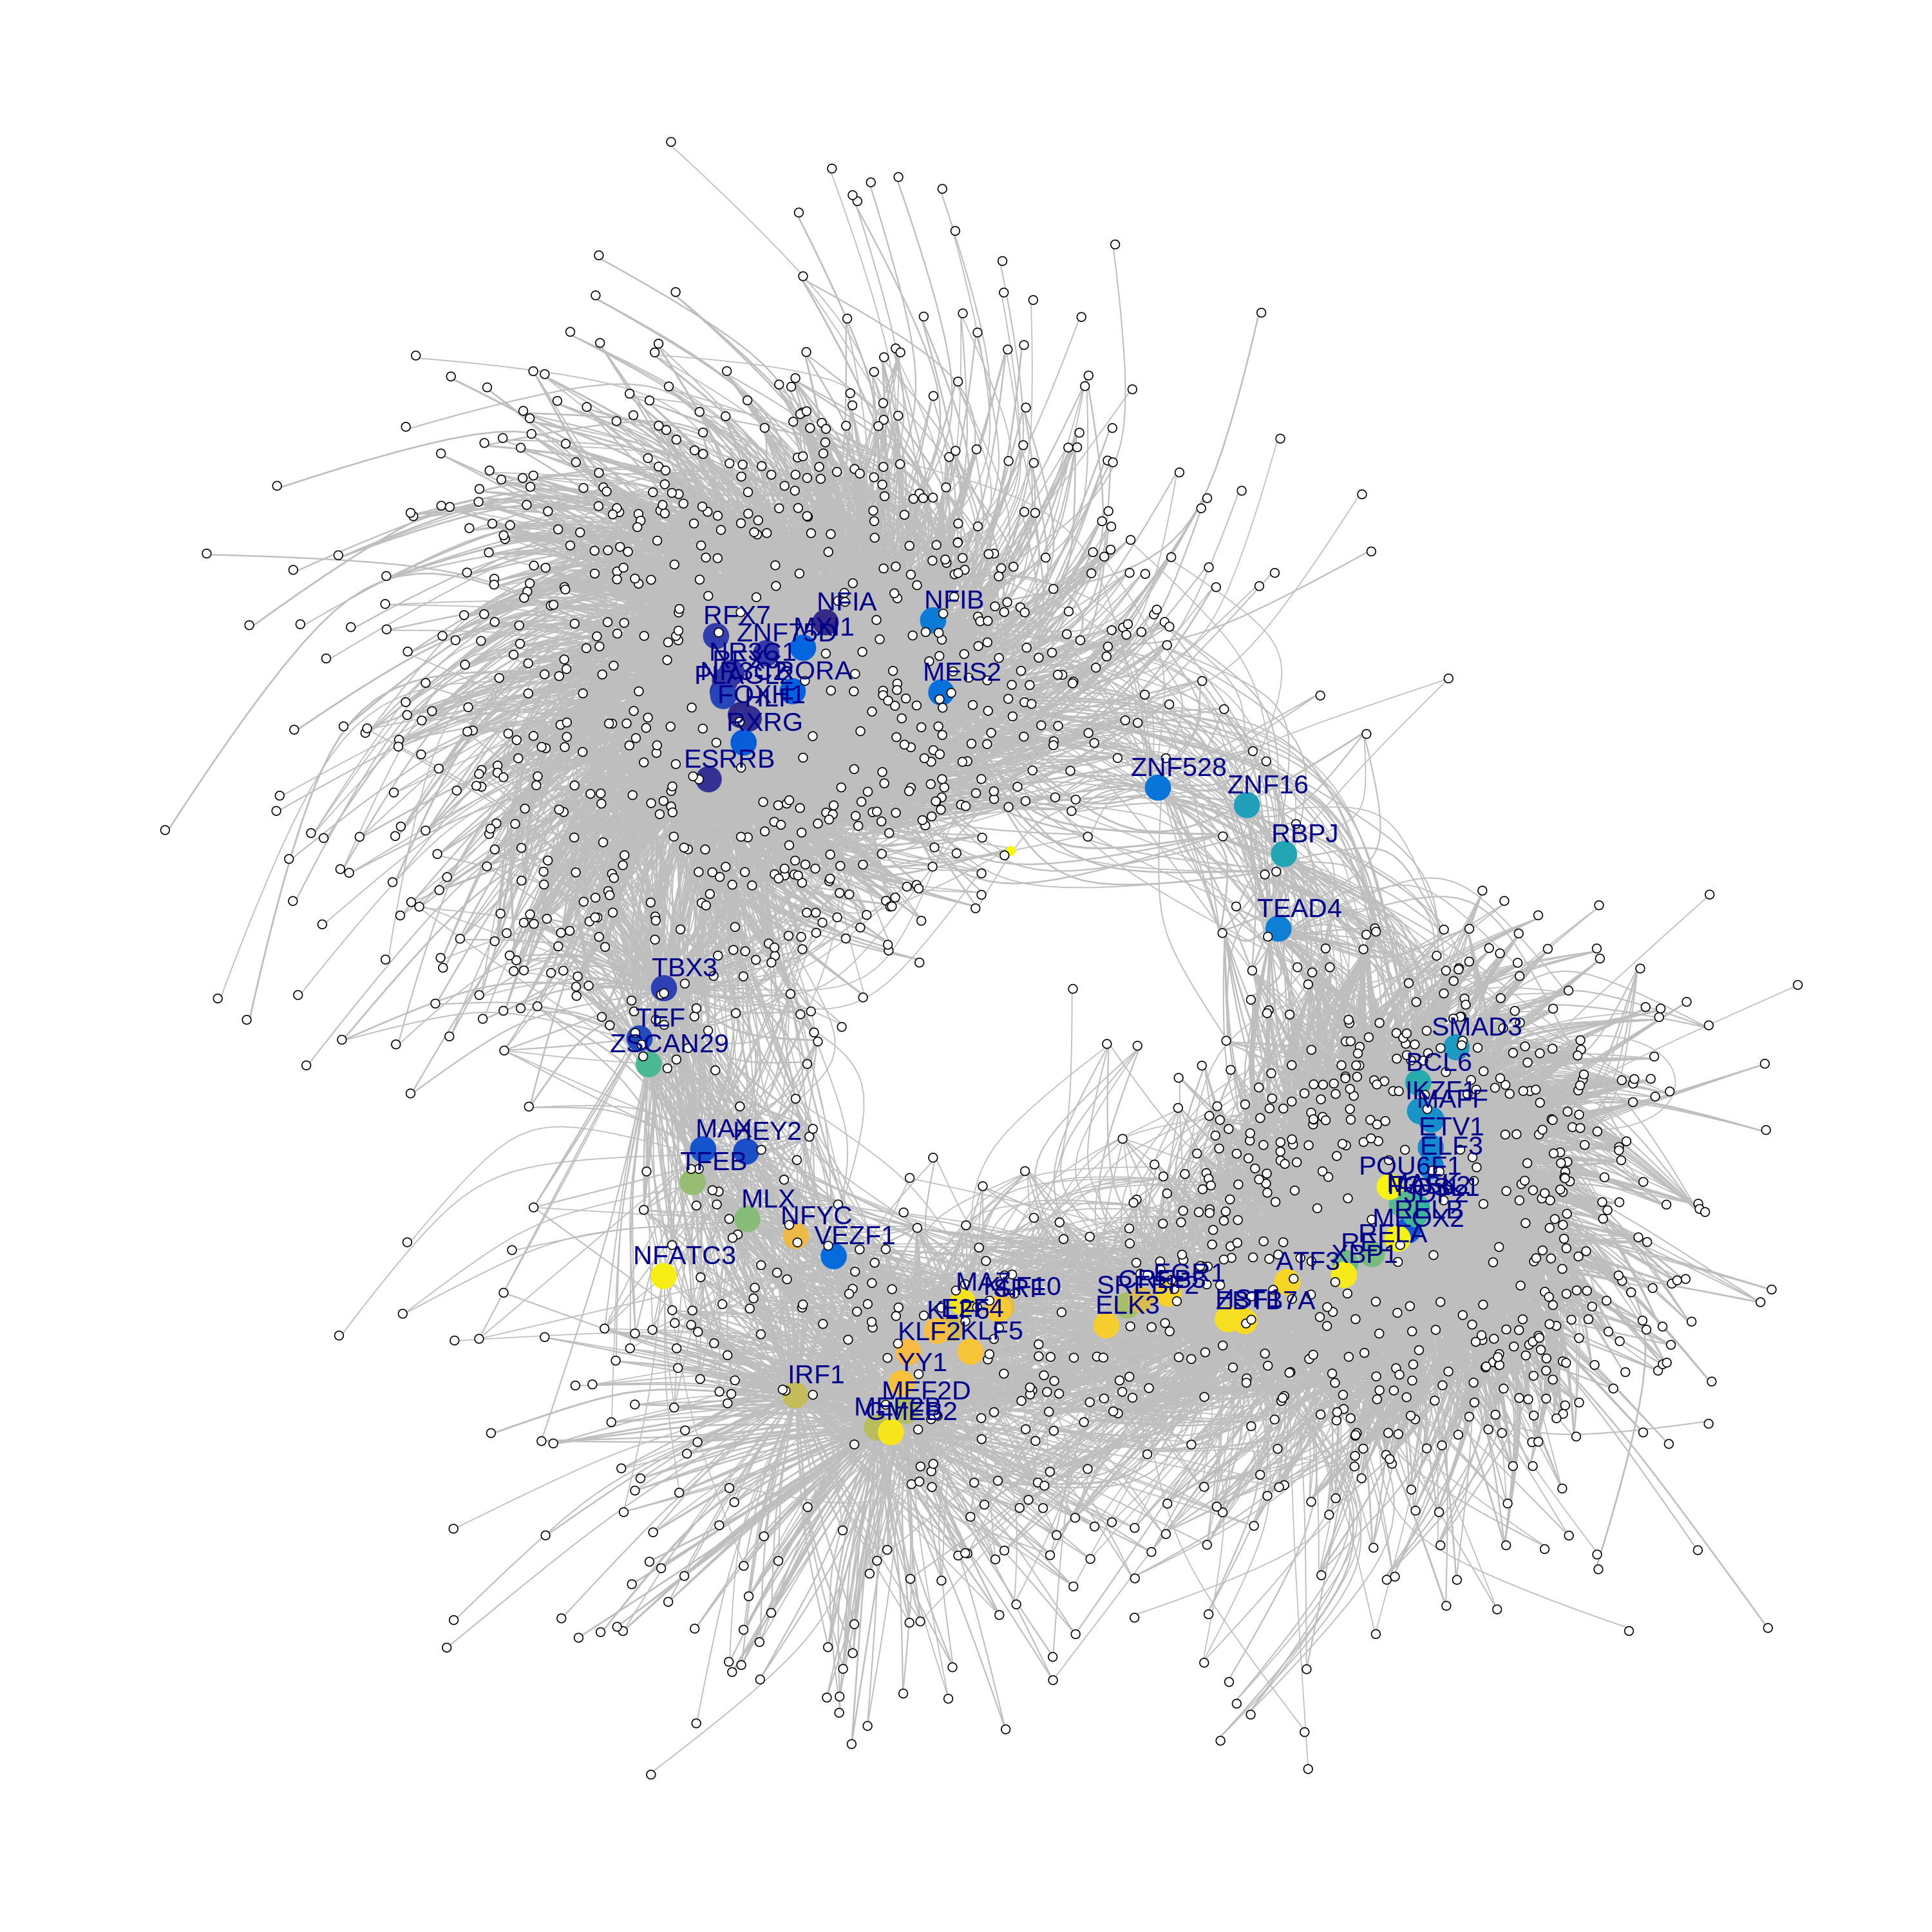

In [35]:
## compute layout
set.seed(42)
co <- layout_with_fr(g, dim = 2, niter = 1000)

## only show labels for TF
V(g)$label <- ifelse(V(g)$name %in% df_cor_2$tf, V(g)$name, NA)

## for TFs, we increase the size of nodes
V(g)$size <- ifelse(V(g)$name %in% df_cor_2$tf, 3, 1)

E(g)$weight <- E(g)$correlation

options(repr.plot.height = 25, repr.plot.width = 25)

plot(g, layout = co, 
     vertex.color = vertex.color,
     vertex.frame.color = vertex.frame.color,
     vertex.label.dist = 0.5,
     edge.width = E(g)$weight*2,
     vertex.label.cex = 2,
     edge.color = adjustcolor("gray", alpha = 1),
     edge.curved=seq(-1, 1, length = ecount(g))
    )

In [36]:
pdf("../data/snATAC_healthy_intermediate_damaged/grn.pdf", height = 20, width = 20)
plot(g, layout = co, 
     vertex.color = vertex.color,
     vertex.frame.color = vertex.frame.color,
     vertex.label.dist = 0.5,
     vertex.label.cex = 2,
     edge.color = adjustcolor("gray", alpha = 1),
     edge.curved=seq(-1, 1, length = ecount(g))
    )
dev.off()

png 
  2

[1] "NFIA"  "FOXH1" "NR3C2" "RFX7"  "RORA"  "MXI1"  "MEIS2" "NFIB"  "TEAD4"
[10] "ELF3"  "BCL6"  "MEF2D" "KLF6"  "ATF3"  "HSF1"

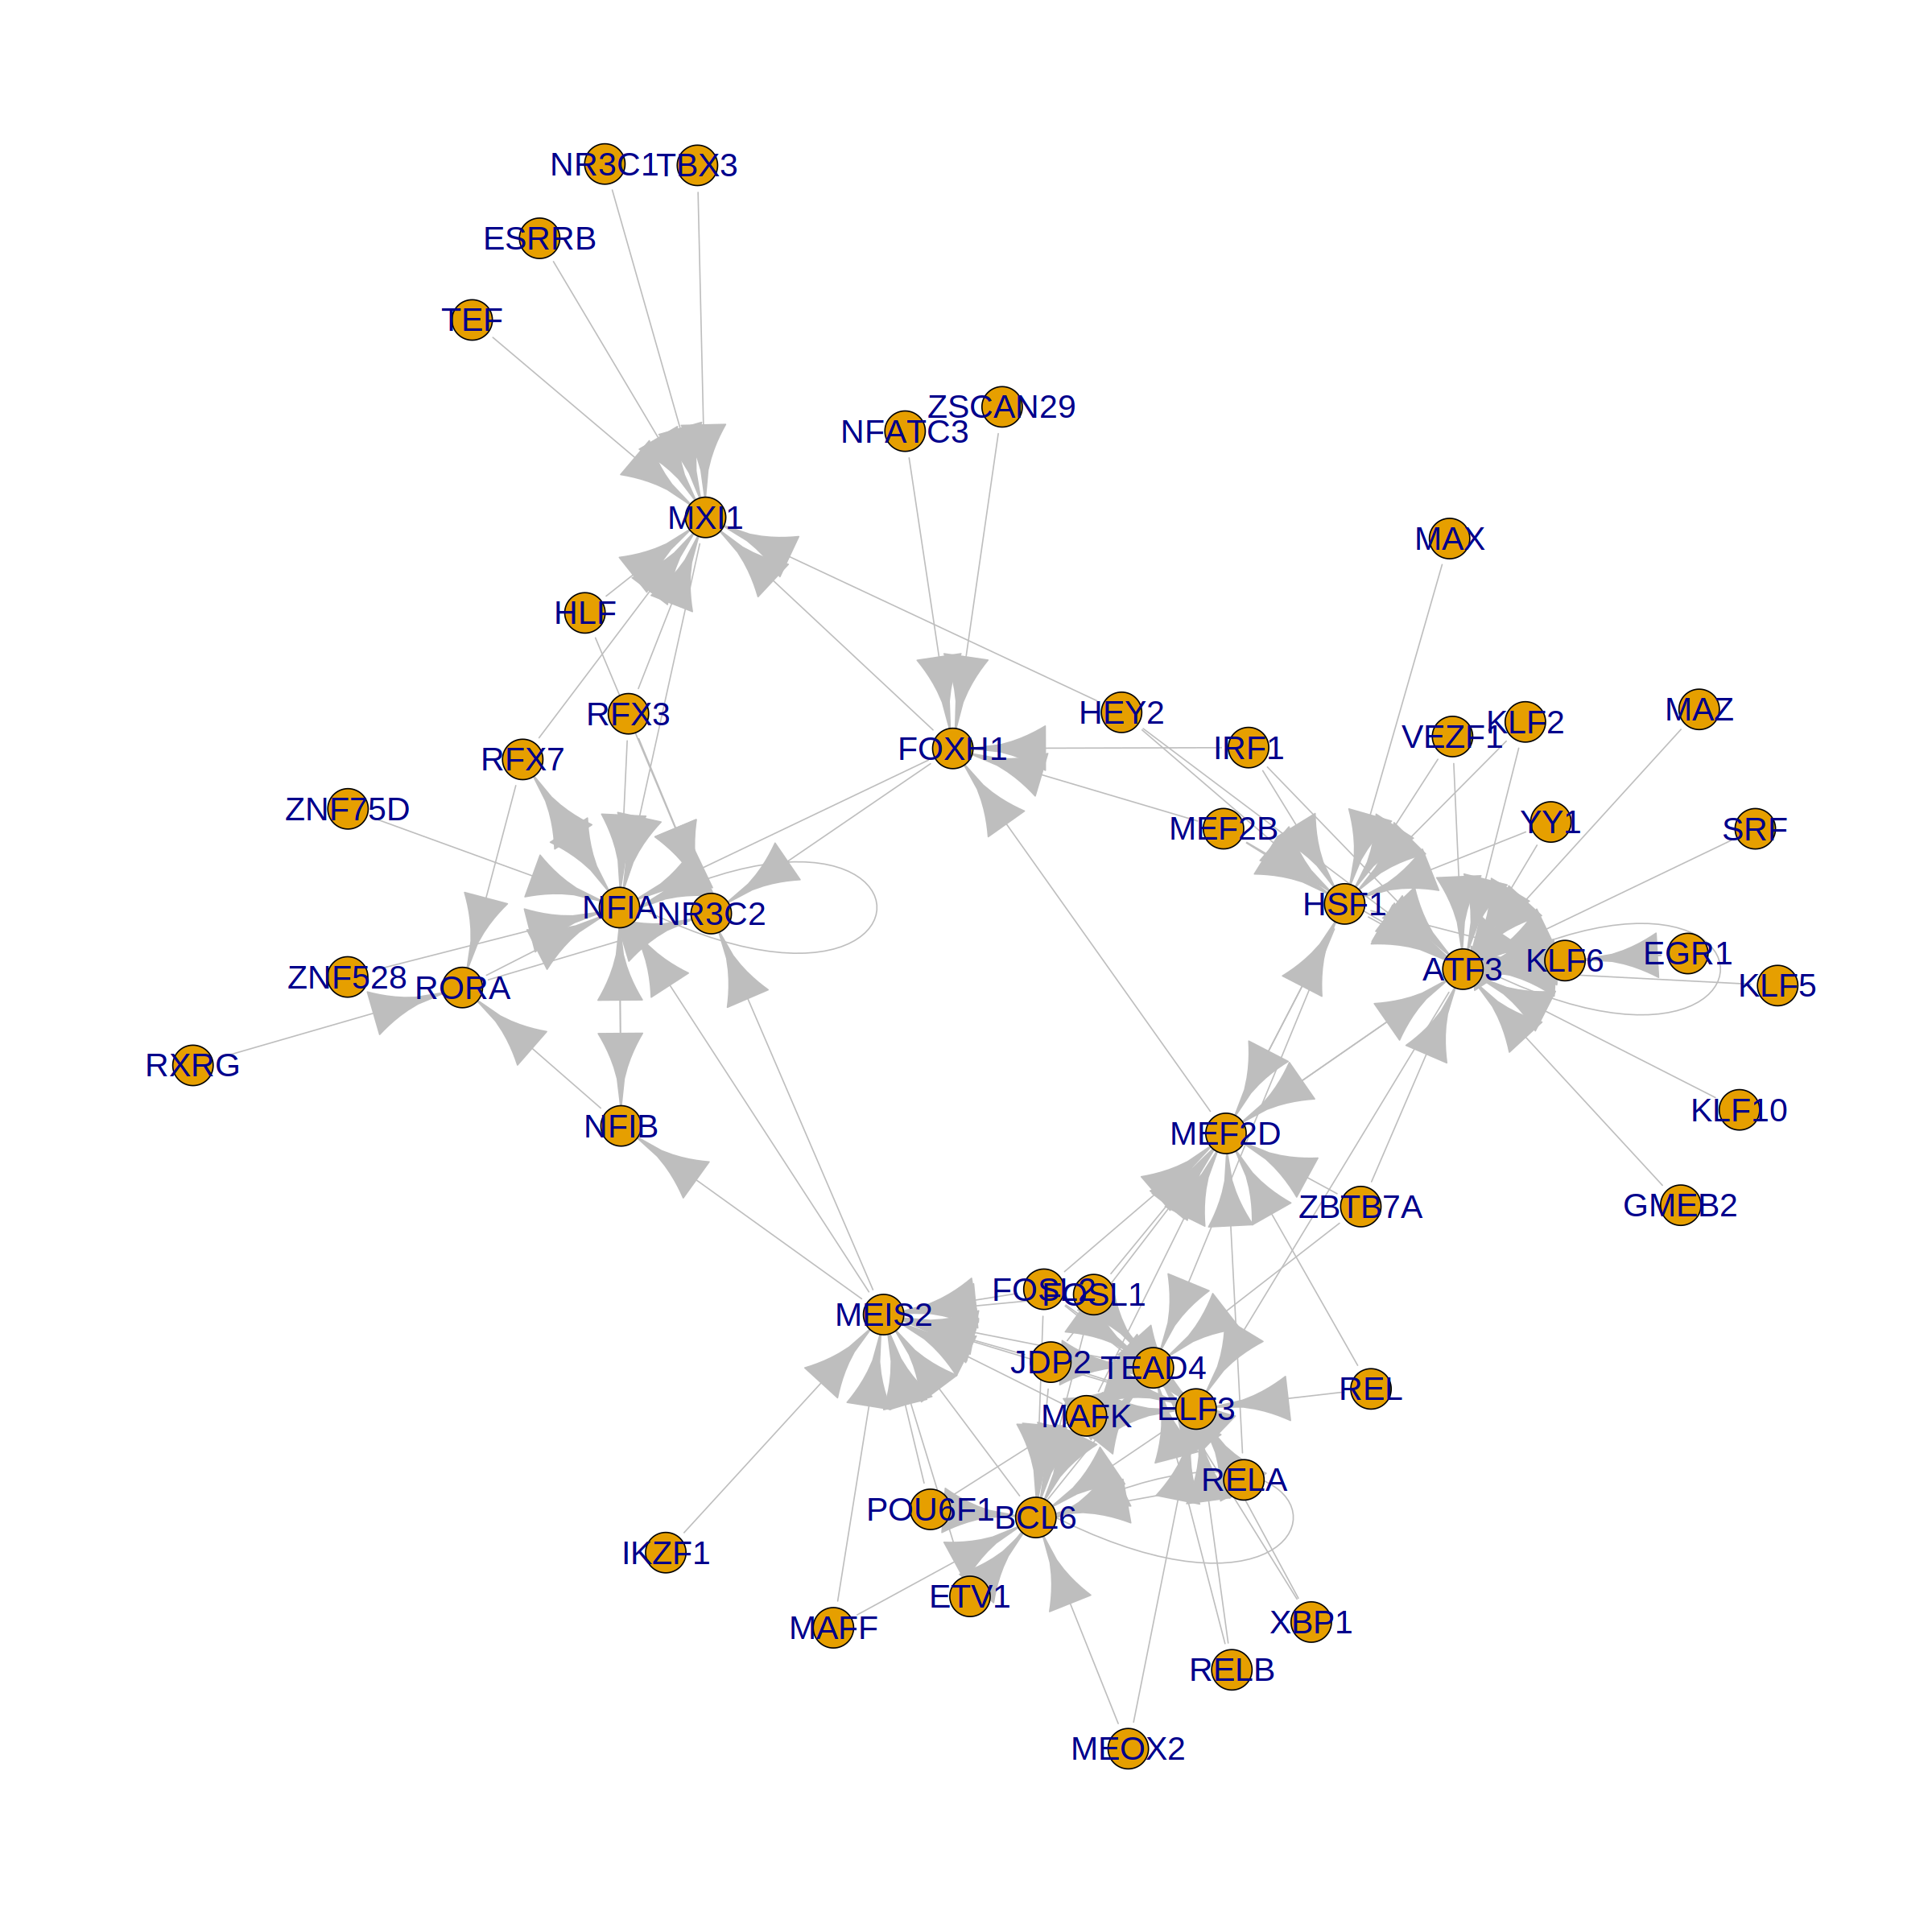

In [46]:
sel.tfs <- intersect(df_cor_2$tf, df_cor_2$gene)
sel.tfs

df_cor_3 <- subset(df_cor_2, gene %in% sel.tfs)

g <- graph_from_data_frame(df_cor_3, directed=TRUE)
co <- layout_with_fr(g, dim = 2, niter = 1000)

options(repr.plot.height = 20, repr.plot.width = 20)

plot(g, layout = co,
    vertex.label.cex = 2,
    vertex.size = 7,
         edge.color = adjustcolor("gray", alpha = 1)
    )

write.csv(df_cor_3, "../data/snATAC_healthy_intermediate_damaged/tf_tf_network.csv", row.names = FALSE)